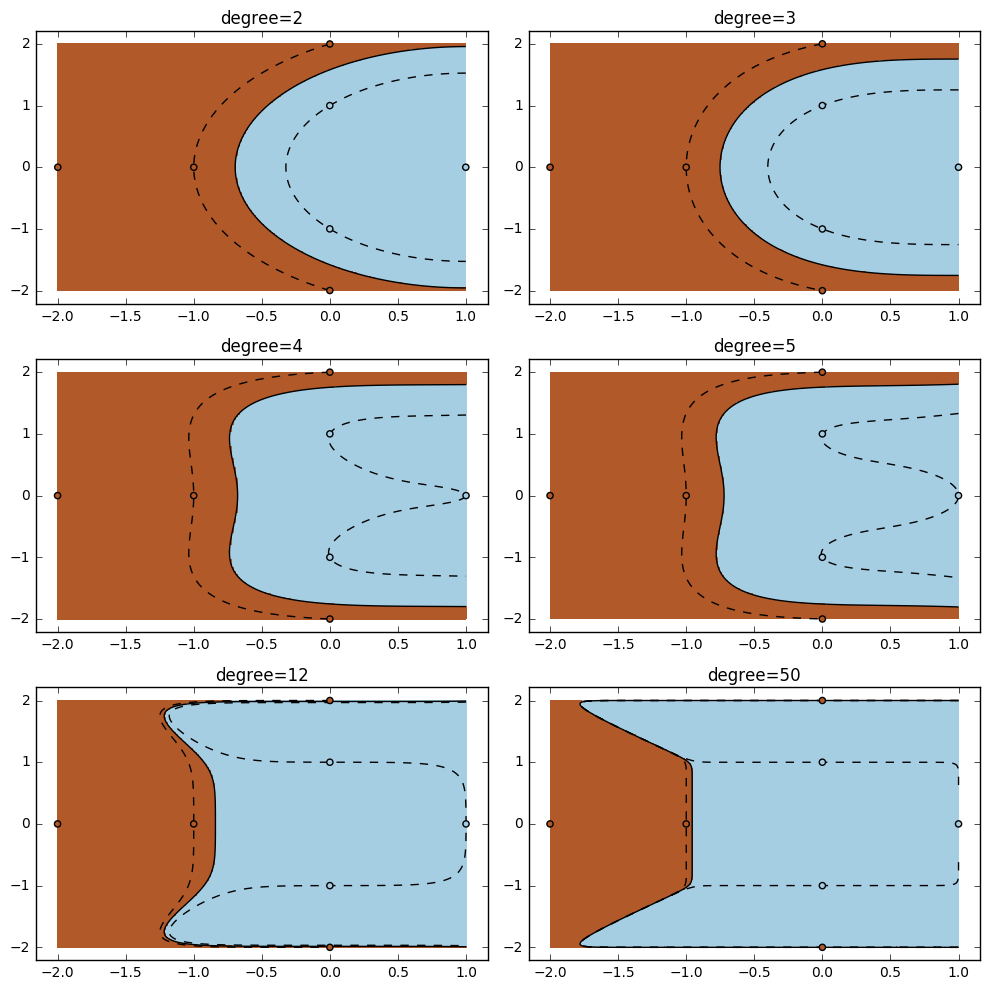

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

degrees = [2,3,4,5,12,50]

plot_row = math.ceil(len(degrees) / 2)
plot_col = 2
X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
Y = np.array([-1, -1, -1, 1, 1, 1, 1])

plt.clf()
plt.subplots(plot_row, plot_col, figsize=(10,10))

for fig_num, deg in enumerate(degrees):
    clf = svm.SVC(kernel='poly', gamma=1, C=np.inf, coef0=1, degree=deg)
    clf.fit(X, Y)

    plt.subplot(plot_row, plot_col, fig_num+1)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1., 0, 1.])

    plt.title('degree=' + str(deg))
    plt.tight_layout() 
plt.show()